In [50]:
!pip install opencv-python

In [51]:
import cv2

In [52]:
img = cv2.imread('C:/ch9.jpg')

In [53]:
img.shape

(425, 640, 3)

In [54]:
img[0]

array([[255, 253, 255],
       [245, 245, 251],
       [242, 248, 255],
       ...,
       [250, 248, 247],
       [252, 250, 249],
       [251, 249, 248]], dtype=uint8)

In [55]:
import matplotlib.pyplot as plt

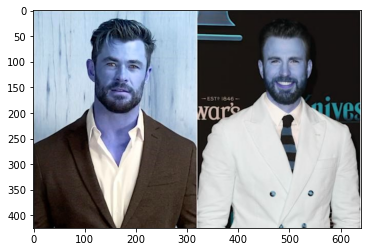

In [56]:
plt.imshow(img)

In [57]:
while True:
    cv2.imshow('result' , img)
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()        

In [58]:
haar_data = cv2.CascadeClassifier(r'haar.xml')

In [59]:
haar_data.detectMultiScale(img)

array([[437,  56, 109, 109],
       [114,  61, 120, 120]])

In [60]:
while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y), (x+w , y+h), (255,0,255), 4)
    cv2.imshow('result' , img)
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()    

In [61]:
import numpy as np

In [62]:
capture = cv2.VideoCapture(0)
data = []
while True:
    flag,img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w , y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            print(len(data))
            if len(data) < 400:
                data.append(face)
        cv2.imshow('result' , img)
        if cv2.waitKey(2) == 27 or len(data) >= 200 : 
            break
capture.release()
cv2.destroyAllWindows() 
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [ ]:
np.save('without_mask.npy', data)

In [17]:
np.save('with_mask.npy', data)

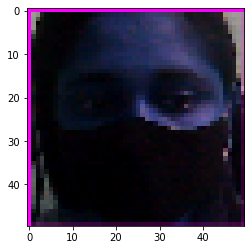

In [18]:
plt.imshow(data[0])

In [63]:
import numpy as np
import cv2

In [64]:
with_mask = np.load('with_mask.npy')
without_mask = np.load('without_mask.npy')

In [65]:
with_mask.shape

(200, 50, 50, 3)

In [66]:
without_mask.shape

(200, 50, 50, 3)

In [67]:
with_mask = with_mask.reshape(200,50 * 50 * 3)
without_mask = without_mask.reshape(200,50 * 50 * 3)

In [68]:
with_mask.shape

(200, 7500)

In [69]:
without_mask.shape

(200, 7500)

In [70]:
X = np.r_[with_mask , without_mask]

In [71]:
X.shape

(400, 7500)

In [72]:
labels = np.zeros(X.shape[0])

In [73]:
labels[200:] = 1.0 

In [74]:
names = {0 : 'Mask', 1 : 'No mask'}

In [75]:
! pip install scikit-learn

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [77]:
from sklearn.model_selection import train_test_split 

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size = 0.20)

In [79]:
x_train.shape

(320, 7500)

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)

In [82]:
x_train[0]

array([1193.7188685 , -951.83103688, 1467.58108046])

In [83]:
x_train.shape

(320, 3)

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size = 0.20)

In [91]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [92]:
y_pred = svm.predict(x_test)   

In [93]:
accuracy_score(y_test, y_pred)

0.9875

In [98]:
haar_data = cv2.CascadeClassifier(r'haar.xml')
capture = cv2.VideoCapture(0)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag,img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w , y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            face = face.reshape(1,-1)
            #face = pca.transform(face)
            pred = svm.predict(face)
            n = names[int(pred)]
            cv2.putText(img, n, (x,y), font, 1, (244,250,250), 2)
            print(n)
        cv2.imshow('result' , img)
        if cv2.waitKey(2) == 27: 
            break
capture.release()
cv2.destroyAllWindows() 
        

No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
Mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
Mask
No mask
Mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
Mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
Mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
Mask
No mask
No mask
No mask
No mask
No mask
Mask
Mask
No mask
Mask
No mask
No mask
No mask
Mask
No mask
Mask
No mask
Mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
M

No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
Mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
No mask
